<a href="https://colab.research.google.com/github/Darshan0902/2024-MACHINE-LEARNING-.-/blob/K5%7CFeature_Engineering-%7C-PCA%2C-Dimensionsinality-Reduction/K4%7C_FEATURE_ENGINEERING_%7C_PCA_%7C_DATA_PIPELINE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Hello! I'm Darshan D. Prabhu,**

---

 A  Data Scientist passionate about leveraging data-driven insights to solve real-world problems. With a background in Artificial Intelligence and Machine Learning, I specialize in Data Science and Data driven projects.


*Let's connect and explore opportunities together:*

---

## Professional Contacts 🦅

[![Follow on GitHub](https://img.shields.io/badge/Follow%20on%20GitHub-%23FF4500?style=flat&logo=github&logoColor=black)](https://github.com/Darshan0902)  Connect with me on GitHub

[![Follow on Medium](https://img.shields.io/badge/Follow%20on%20Medium-%23FF4500?style=flat&logo=medium&logoColor=white)](https://prabhudarshan09.medium.com/) Follow my Medium articles

[![LinkedIn](https://img.shields.io/badge/Connect%20on%20LinkedIn-%23FF4500?style=flat&logo=linkedin&logoColor=white)](https://linkedin.com/in/darshanprabhu009/) Connect with me on LinkedIn

---

Feel free to reach out for collaborations, discussions, or suggestions ✔


---
Table of Content :



## STEP-1 : IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

## STEP-2 :  IMPORTING DATASETS.

#### <span style="color: orange;"> 2.2.1: Training dataset. </span>

In [4]:
train_df = pd.read_csv("train.csv")
train_df


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [11]:
# resetting the Index :
train_df = train_df.reset_index(drop = True)
train_df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


#### <span style="color: orange;"> 2.2.2: Testing dataset. </span>

In [6]:

#Retrieving remaining rows in to testing dataset:
test_df = pd.read_csv("test.csv")
test_df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


In [7]:
# Resetting the value of "testing data"
test_df = test_df.reset_index(drop = True)
test_df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


#### Defining the "Dependent variables" (Y-Test) and (Y-Train) :


In [8]:
y_train = train_df["MedInc"].to_numpy()
y_test = test_df["MedInc"].to_numpy()

print("The shape of Y_train is {} and Y_test is {}".format(y_train.shape,y_test.shape))

The shape of Y_train is (37137,) and Y_test is (24759,)


1 -  Using a baseline model.

In [9]:
#Average or Mean of the median_income
average_median_income = train_df["MedInc"].mean()
print("average_median_income:",average_median_income)

average_median_income: 3.851029379405983


#### Getting the error of Baseline Model :


In [12]:
# Getting the baseline value for future predictions.
baseline_model_test_predictions = [average_median_income]*len(test_df)

#Getting the mean absolute error.
mean_absolute_error(baseline_model_test_predictions,  y_test)

1.3490855193228912

The value for mean absolute error we recieved is indeed terrible since it is in 90,000 . Lets do some Feature Engineering

##  STEP- 2.1 :  FEATURE ENGINEERING.


## II- Dimensionality reduction.

## Dimensionality reduction can be used to remove or get rid of the columns or removing unwanted columns.

In [13]:

#Observing the correlation bewteen the total_room , total_bedrooms and households.

train_df[['AveRooms' ,	'AveBedrms']].corr()

,AveRooms,AveBedrms
AveRooms,1.000000,0.174753
AveBedrms,0.174753,1.000000


### From the above statement we can see as the total number of rooms increases the total number of bedrooms seems to be increasing as well


##  Getting x_test_3 and x_train_3 and having three inputs into it as :
total_rooms	 | total_bedrooms	 |  households
    

In [14]:
x_train_3 = train_df[['AveRooms' ,	'AveBedrms']].to_numpy()
x_train_3.shape

(37137, 2)

In [15]:
x_test_3 = test_df[['AveRooms'	,'AveBedrms']].to_numpy()
x_test_3.shape

(24759, 2)

##  Using Random Forest Regression model to get error in (X_train_3 , Y_train) and (X_test_3 , Y_test) :

In [16]:
# Fitting of the data .
forest_base = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_3 , y_train)

# predicting future values for x_test_3 based on past values .
forest_base_test_predictions = forest_base.predict(x_test_3)

#Checking the mean absolute error
mean_absolute_error(forest_base_test_predictions , y_test)

0.822738314150517

##  Importing PCA (Principal component Analysis):
   #### PCA is used to remove or reduce unwanted dimensions from the dataset it is a type of dimensionality reduction method.
    

In [17]:
# Importing PCA .
from sklearn.decomposition import PCA

# Using PCA function and passing arguments as n_components  having value "2".
pca = PCA(n_components = 2)

# Fitting the data into the model.
pcs = pca.fit(x_train_3)

pca

PCA(n_components=2)

###  Using PCA to transform (X_train_3) and (X_test_3) into X_train_PCA and X_test_PCA :

In [18]:
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

x_train_pca.shape , x_test_pca.shape

((37137, 2), (24759, 2))



## Using Random Forest Regression model to get error in (X_train_PCA , Y_train) and (X_test_PCA , Y_test) :

In [19]:
# Fitting in the training model.
forest_pca = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_pca,y_train)

# using .predict() to predict future values using testing set.
pca_predict = forest_pca.predict(x_test_pca)

# Cheking the error rate using MAE
mean_absolute_error(y_test,pca_predict)



### <span style="color: #FF4500;"> Using Random Forest Regression model to get error in (X_train_3 , Y_train) and (X_test_3 , Y_test) :

### <span style="color: #FF4500;"> Using Random Forest Regression model to get error in (X_train_PCA , Y_train) and (X_test_PCA , Y_test) :

0.8213512605973768

## III-  Pre-Processing OR Scaling.

### Scaling is referred and used when the variance between values is to be removed . We scale all the values as such the variance or difference between values can be removed and also to remove the Outliers.

In [21]:
# three types of scalers to be used for scaling:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer

# For visualizations ,
import matplotlib.pyplot as plt


###  Scalar :

(array([2.8590e+03, 2.9394e+04, 4.8150e+03, 5.4000e+01, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-3.57483559, -1.25466162,  1.06551235,  3.38568632,  5.70586029,
         8.02603426, 10.34620823, 12.6663822 , 14.98655617, 17.30673014,
        19.62690411]),
 <BarContainer object of 10 artists>)

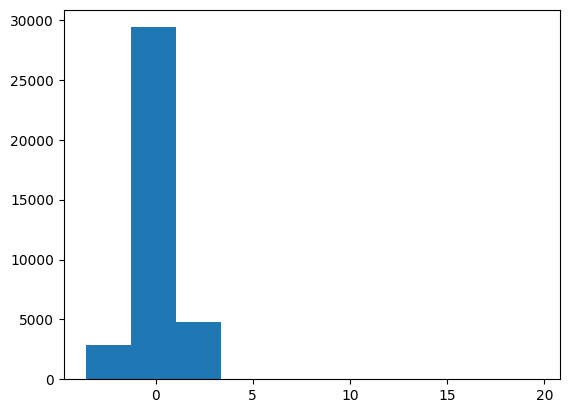

In [22]:
# fitting of the data :
scalar = StandardScaler().fit(x_train_3)

# Transforming the value :
x3_scaler_train_transform = scalar.transform(x_train_3)

#plotting value :
plt.hist(x3_scaler_train_transform[:,0])

In [23]:
#Printing X_train _scale :
x3_scaler_train_transform

array([[-1.10755622,  0.51711229],
       [ 0.70488387, -0.08278168],
       [ 1.13782988,  0.42461365],
       ...,
       [-0.40146859,  0.40710423],
       [ 0.45343909,  0.06396352],
       [ 0.21662186, -0.03646957]])

### MINMAX Scalar :

(array([2.8590e+03, 2.9394e+04, 4.8150e+03, 5.4000e+01, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

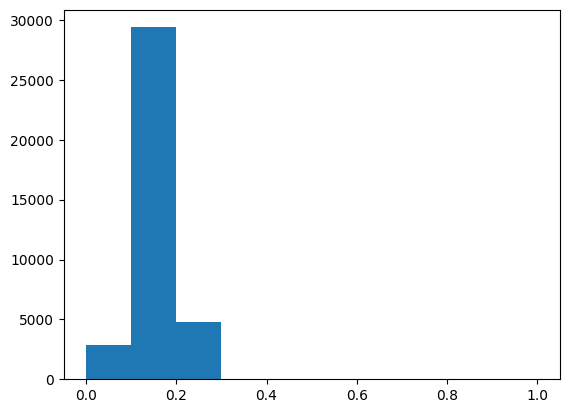

In [24]:
# fitting of the data :
minmax = MinMaxScaler().fit(x_train_3)

# Transforming the value :
x3_minmax_scaler_transform = minmax.transform(x_train_3)

#plotting value :
plt.hist(x3_minmax_scaler_transform[:,0])

## NORMALIZER :

(array([4.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 1.900e+01, 4.200e+01,
        1.320e+02, 5.860e+02, 6.844e+03, 2.950e+04]),
 array([0.72467626, 0.75182783, 0.77897939, 0.80613096, 0.83328252,
        0.86043409, 0.88758566, 0.91473722, 0.94188879, 0.96904035,
        0.99619192]),
 <BarContainer object of 10 artists>)

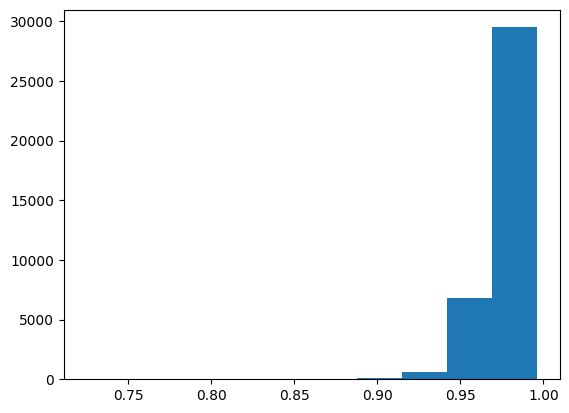

In [25]:
# fitting of the data :
normal = Normalizer().fit(x_train_3)

# Transforming the value :
x3_normalize = normal.transform(x_train_3)

#plotting value :
plt.hist(x3_normalize[:,0])

## Pre-process scale for x_test_3

In [26]:
x3_scaler_test_transform = scalar.transform(x_test_3)
x3_scaler_test_transform.shape

(24759, 2)

##  Getting error using Random forest regressor (x_scaler_train_transform) and (x_scaler_test_transform).

In [27]:
random_scaled_transform = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x3_scaler_train_transform,y_train)
random_scaled_model = random_scaled_transform.predict(x3_scaler_test_transform)
mean_absolute_error(y_test,random_scaled_model)

0.8220326463240085

## PCA STEPS using Standard Scaler :  1.) Standardization 2.) PCA 3.) RandomForest.

In [28]:
from sklearn.pipeline import Pipeline


# Fitting the pipeline ,
scale_pca_pipe_forest = Pipeline(steps = [('Scaler' , StandardScaler()),
                                          ('PCA',PCA(n_components =2)),
                                           ('Forest',RandomForestRegressor(n_estimators = 50 , max_depth = 5))])



scale_pca_pipe_forest


Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

## Getting error of Standardization :

In [29]:
scale_pca_pipe_forest.fit(x_train_3,y_train)
scale_pca_pipe_predict = scale_pca_pipe_forest.predict(x_test_3)
mean_absolute_error(y_test,scale_pca_pipe_predict)

0.8277671449184938

## PCA STEPS using Normalizer :  1.) Standardization 2.) PCA 3.) RandomForest.

In [30]:
from sklearn.pipeline import Pipeline


# Fitting the pipeline ,
scale_pca_pipe_forest = Pipeline(steps = [('Scaler' , Normalizer()),
                                          ('PCA',PCA(n_components =2)),
                                           ('Forest',RandomForestRegressor(n_estimators = 50 , max_depth = 5))])



scale_pca_pipe_forest


Pipeline(steps=[('Scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [31]:
scale_pca_pipe_forest.fit(x_train_3,y_train)
scale_pca_pipe_predict = scale_pca_pipe_forest.predict(x_test_3)
mean_absolute_error(y_test,scale_pca_pipe_predict)

0.8236985988088861

## IV-  Categorical encoding. [DUMMY / ONE-HOT] </p>

####  Note : categorical values ranges between 0 and just 1 , we do not take any other values , we can also term it as binary or logistic method.

 ### Getting Dummy (one-hot encoding) for training dataset :


In [32]:
# Getting Dummy (one-hot encoding) for training dataset :

# The statement below will retrieve  categorical values for the c11olumn "ocean_proximity"
train_dummies = pd.get_dummies(train_df['Population'])

# once retrieved the values are gonna be inserted into the dataframe.
train_dummies.head()

,3.000,4.125,5.000,6.000,7.000,8.000,11.000,13.000,14.000,15.000,...,16384.000,16507.000,16649.000,20808.000,22899.000,26012.000,26135.000,35375.000,35400.000,35682.000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Concatinating the dummy values into training data.

In [33]:
train_df = pd.concat([train_df,train_dummies],axis = 1)
train_df.head()


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,...,16384.0,16507.0,16649.0,20808.0,22899.0,26012.0,26135.0,35375.0,35400.0,35682.0
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,...,0,0,0,0,0,0,0,0,0,0
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,...,0,0,0,0,0,0,0,0,0,0
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,...,0,0,0,0,0,0,0,0,0,0
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,...,0,0,0,0,0,0,0,0,0,0
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,...,0,0,0,0,0,0,0,0,0,0


### Total number of rows in dataframe (train_dummies):
    

In [34]:
train_df['Population'].value_counts()

1605.0     85
1200.0     74
1640.0     73
1543.0     72
883.0      71
           ..
6307.0      1
26135.0     1
4644.0      1
2861.0      1
2035.0      1
Name: Population, Length: 3694, dtype: int64

## Removing the dummy 2035.0   since it has very low appearances
    


In [35]:
train_df.drop(26135.0,inplace = True , axis = 1)
train_df.head()


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,...,16373.0,16384.0,16507.0,16649.0,20808.0,22899.0,26012.0,35375.0,35400.0,35682.0
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,...,0,0,0,0,0,0,0,0,0,0
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,...,0,0,0,0,0,0,0,0,0,0
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,...,0,0,0,0,0,0,0,0,0,0
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,...,0,0,0,0,0,0,0,0,0,0
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,...,0,0,0,0,0,0,0,0,0,0


## Getting Dummy (one-hot encoding) for testing dataset :



In [36]:
# Getting Dummy (one-hot encoding) for testing dataset :

# The statement below will retrieve  categorical values for the column "ocean_proximity"
test_dummies = pd.get_dummies(test_df['Population'])

# once retrieved the values are gonna be inserted into the dataframe.
test_dummies.head()

,3.0,5.0,8.0,9.0,11.0,13.0,14.0,15.0,16.0,17.0,...,15803.0,16057.0,16276.0,22517.0,26214.0,28566.0,35425.0,35507.0,35674.0,35682.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Concating both the dataframes

In [38]:

test_df = pd.concat([test_df,test_dummies],axis = 1)
test_df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,3.0,...,15803.0,16057.0,16276.0,22517.0,26214.0,28566.0,35425.0,35507.0,35674.0,35682.0
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85,0,...,0,0,0,0,0,0,0,0,0,0
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29,0,...,0,0,0,0,0,0,0,0,0,0
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81,0,...,0,0,0,0,0,0,0,0,0,0
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34,0,...,0,0,0,0,0,0,0,0,0,0
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29,0,...,0,0,0,0,0,0,0,0,0,0


## Total number of rows in dataframe (test_dummies):


In [39]:
test_df['Population'].value_counts()

1504.0    56
1227.0    51
999.0     51
1508.0    48
1443.0    47
          ..
3785.0     1
326.0      1
4566.0     1
3717.0     1
15.0       1
Name: Population, Length: 3454, dtype: int64

##  Removing the dummy 15.0 since it has very low appearances
    


In [40]:
test_df.drop(15.0,inplace = True , axis = 1)
test_df.head()


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,3.0,...,15803.0,16057.0,16276.0,22517.0,26214.0,28566.0,35425.0,35507.0,35674.0,35682.0
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85,0,...,0,0,0,0,0,0,0,0,0,0
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29,0,...,0,0,0,0,0,0,0,0,0,0
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81,0,...,0,0,0,0,0,0,0,0,0,0
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34,0,...,0,0,0,0,0,0,0,0,0,0
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29,0,...,0,0,0,0,0,0,0,0,0,0


## Making a model that only checks the dummy or takes the dummy value
    COLUMN EXTRACTTON :


## 1 - Training model.


In [42]:
x_train_dummies = train_df.to_numpy()[:,-4]
x_train_dummies

array([0., 0., 0., ..., 0., 0., 0.])

##  2 - Testing model.

In [43]:
x_test_dummies = test_df.to_numpy()[:,-4]
x_test_dummies

array([0., 0., 0., ..., 0., 0., 0.])

## V- BINNING. [GROUPING | AGGREGATING]
          
          Binning or discretization is used to transform a continuous or numerical variable into a categorical feature. Binning of continuous variables introduces non-linearity and tends to improve the performance of the model. It can also be used to identify missing values or outliers.

<Axes: >

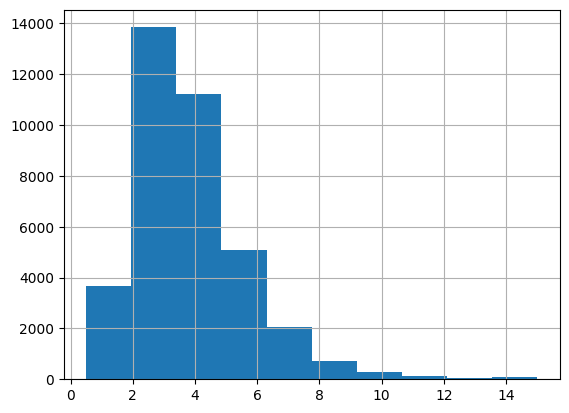

In [44]:
train_df['MedInc'].hist()

In [45]:
# Adding a new column to the training dataframe where "median_age < 30".
train_df['median_income < 30'] = (train_df['MedInc'] < 30).astype(int)
train_df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,...,16384.0,16507.0,16649.0,20808.0,22899.0,26012.0,35375.0,35400.0,35682.0,median_income < 30
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,...,0,0,0,0,0,0,0,0,0,1
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,...,0,0,0,0,0,0,0,0,0,1
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,...,0,0,0,0,0,0,0,0,0,1
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,...,0,0,0,0,0,0,0,0,0,1
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,...,0,0,0,0,0,0,0,0,0,1


## Setting up X_train_median_income which only uses the binary indicator :

In [46]:
X_train_median_income = train_df["median_income < 30"].to_numpy().reshape(-1,1)
X_train_median_income.shape

(37137, 1)

## Setting up X_test_median_income which only uses the binary indicator :

In [47]:
X_test_median_income = (test_df["MedInc"] < 30).to_numpy().reshape(-1,1)
X_test_median_income.shape

(24759, 1)

## VI-  CLUSTERING.
          
          Clustering is also defined as grouping of the elements having the same data-types or basically some similarties

## Lets plot California first :

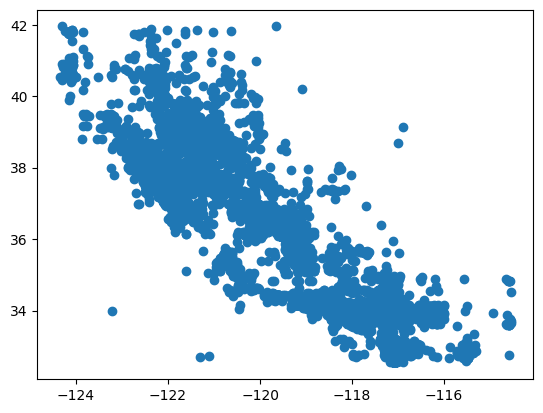

In [48]:
plt.scatter(train_df['Longitude'],train_df['Latitude'])

##  Make K-means model from Longitude and latitude and get clusters :

In [49]:
# Importing K means.
from sklearn.cluster import KMeans

# putting the 'long' and 'latitude' values into a variable
x_train_lat_long = train_df[['Longitude','Latitude']].to_numpy()

#using k-means
kmeans = KMeans(n_clusters = 7).fit(x_train_lat_long)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 3, ..., 6, 2, 3], dtype=int32)

## Lets plot the colourful map :

In [50]:
import plotly.express as px


# we divided the map on the basis of clusters we defined above as "3".
px.scatter(x=train_df['Longitude'] , y = train_df['Latitude'] , color = kmeans.labels_)

 In the above map , the colors represent each clusters numbered between 1-7.

## Creating x_train_clustering that uses only one hot encoding from the cluster label

In [51]:
x_train_clustering = pd.get_dummies(pd.Series(kmeans.labels_)).to_numpy()
x_train_clustering

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Predict the clusters for test data , and create X_test_clustering using hot_encoding.

In [52]:
x_test_lat_long = test_df[['Longitude','Latitude']].to_numpy()
x_test_clustering = pd.get_dummies(pd.Series(kmeans.predict(x_test_lat_long))).to_numpy()
x_test_clustering.shape

(24759, 7)

## VII-<br> FEATURE SELECTION [COMBINATION OF FEATURES].
          
It is the process of combining all the essential features we made above.

##  1 - TRAINING DATA :

## Observing the shape of x_train_clustering , x_train_scaled , dummy_x_train :

In [53]:
x_train_clustering.shape ,  train_dummies.shape ,  x3_scaler_train_transform.shape

((37137, 7), (37137, 3694), (37137, 2))

## CONCATENATION :

In [54]:
x_train_full = np.concatenate([x_train_clustering , train_dummies , x3_scaler_train_transform],axis =1)
x_train_full.shape

(37137, 3703)

## 2 -  TESTING DATA :

##  Observing the shape of x_test_clustering , x_test_scaled , dummy_x_test :

In [55]:
x_test_clustering.shape ,  test_dummies.shape ,  x3_scaler_test_transform.shape

((24759, 7), (24759, 3454), (24759, 2))

In [56]:
x_test_full = np.concatenate([x_test_clustering , test_dummies , x3_scaler_test_transform],axis =1)
x_test_full.shape

(24759, 3463)

## FINAL TESTING :

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming you have already defined x_train_full, y_train, x_test_full, and y_test

# Check the number of features in the training and testing data sets
print("Number of features in x_train_full:", x_train_full.shape[1])
print("Number of features in x_test_full:", x_test_full.shape[1])

# Create a subset of x_train_full with the same number of features as x_test_full
x_train_subset = x_train_full[:, :x_test_full.shape[1]]

# Train the Random Forest Regressor using the subset of training data
random_forest_clustering = RandomForestRegressor(n_estimators=25, max_depth=5).fit(x_train_subset, y_train)

# Make predictions on the test data using the trained model
random_forest_predict = random_forest_clustering.predict(x_test_full)

# Calculate the mean absolute error
mae = mean_absolute_error(random_forest_predict, y_test)
print("Mean Absolute Error:", mae)

# Fitting in the training model.
forest_pca = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_pca,y_train)

# using .predict() to predict future values using testing set.
pca_predict = forest_pca.predict(x_test_pca)

# Cheking the error rate using MAE
mean_absolute_error(y_test,pca_predict)





Number of features in x_train_full: 3703
Number of features in x_test_full: 3463
Mean Absolute Error: 1.2676995548473675


0.8218360766194961

## VIII-  FINAL CONCLUSION.          


###   Lets compare results ;


In [58]:
#Average or Mean of the median_income
average_median_income = train_df["MedInc"].mean()
print("average_median_income:",average_median_income)
# Getting the baseline value for future predictions.
baseline_model_test_predictions = [average_median_income]*len(test_df)

#Getting the mean absolute error.
mean_absolute_error(baseline_model_test_predictions,  y_test)

average_median_income: 3.851029379405983


1.3490855193228912

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming you have already defined x_train_full, y_train, x_test_full, and y_test

# Check the number of features in the training and testing data sets
print("Number of features in x_train_full:", x_train_full.shape[1])
print("Number of features in x_test_full:", x_test_full.shape[1])

# Create a subset of x_train_full with the same number of features as x_test_full
x_train_subset = x_train_full[:, :x_test_full.shape[1]]

# Train the Random Forest Regressor using the subset of training data
random_forest_clustering = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_subset, y_train)

# Create a subset of x_test_full with the same number of features as x_train_subset
x_test_subset = x_test_full[:, :x_train_subset.shape[1]]

# Make predictions on the test data using the trained model
random_forest_predict = random_forest_clustering.predict(x_test_subset)

# Calculate the mean absolute error
final_test = mean_absolute_error(random_forest_predict, y_test)
print("The MAE value for the final test is: {}".format(final_test))


Number of features in x_train_full: 3703
Number of features in x_test_full: 3463
The MAE value for the final test is: 1.2673057634926184


## Using Random Forest Regression model to get error in (X_train_3 , Y_train) and (X_test_3 , Y_test) :


In [60]:
# Fitting of the data .
forest_base = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_3 , y_train)

# predicting future values for x_test_3 based on past values .
forest_base_test_predictions = forest_base.predict(x_test_3)

#Checking the mean absolute error
mean_absolute_error(forest_base_test_predictions , y_test)

0.8225289576243142

### Using Random Forest Regression model to get error in (X_train_PCA , Y_train) and (X_test_PCA , Y_test) :

In [61]:
# Fitting in the training model.
forest_pca = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_pca,y_train)

# using .predict() to predict future values using testing set.
pca_predict = forest_pca.predict(x_test_pca)

# Cheking the error rate using MAE
mean_absolute_error(y_test,pca_predict)






0.8217232133768081

In [62]:
print("The amount of error we reduced from comparing the FIRST_TEST & FINAL_TEST is {}".format(1.26736141539632-0.8219183618368934))

The amount of error we reduced from comparing the FIRST_TEST & FINAL_TEST is 0.4454430535594266


-------
# Thank You! 😸

Thank you for exploring my Colab notebook! I hope you found it insightful and informative. If you have any questions, feedback, or would like to connect, feel free to reach out through any of the platforms below:

---

## Professional Contacts 🐈

[![Follow on GitHub](https://img.shields.io/badge/Follow%20on%20GitHub-%23FF4500?style=flat&logo=github&logoColor=black)](https://github.com/Darshan0902) Connect with me on GitHub

[![Follow on Medium](https://img.shields.io/badge/Follow%20on%20Medium-%23FF4500?style=flat&logo=medium&logoColor=white)](https://prabhudarshan09.medium.com/) Follow my Medium articles

[![LinkedIn](https://img.shields.io/badge/Connect%20on%20LinkedIn-%23FF4500?style=flat&logo=linkedin&logoColor=white)](https://linkedin.com/in/darshanprabhu009/) Connect with me on LinkedIn

---

To download and edit the notebook use below button :

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Darshan0902/2024-MACHINE-LEARNING-.-/blob/main/analysis_on_airbnb_listings.ipynb)

## Feel free to stay in touch, and I look forward to connecting with you soon! 😊